In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from statistics import mean, median, mode 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

mouse_drug_df=pd.read_csv(mouse_drug_data)
clinical_trial_df=pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_df,mouse_drug_df,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Response_Data_grouped_df= combined_df.groupby(['Drug','Timepoint'])
Avg_volume = Response_Data_grouped_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
Response_df =pd.DataFrame({"Tumor Volume (mm3)": Avg_volume})
Response_sorted_df =Response_df.sort_values(["Drug","Timepoint"], ascending=True).reset_index()

# Preview DataFrame
Response_sorted_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Deviation_data_df = combined_df[["Drug", "Timepoint","Tumor Volume (mm3)"]]
Deviation_grouped_df= combined_df.groupby(['Drug','Timepoint'])
Dev = Deviation_grouped_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
Deviation_df =pd.DataFrame({"Tumor Volume (mm3)": Dev})
Deviation_sorted_df =Deviation_df.sort_values(["Drug",'Timepoint'], ascending=True).reset_index()

# Preview DataFrame
Deviation_sorted_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Chart_data=Response_sorted_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
Chart_data


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# Minor Data Munging to Re-Format the Data Frames
Deviation_data=Deviation_sorted_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Deviation_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


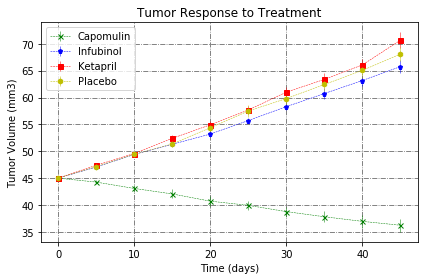

In [34]:
# Generate the Plot (with Error Bars)
plt.errorbar(Chart_data.index, Chart_data["Capomulin"], yerr=Deviation_data["Capomulin"], color="g", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Chart_data.index, Chart_data["Infubinol"], yerr=Deviation_data["Infubinol"], color="b", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Chart_data.index, Chart_data["Ketapril"], yerr=Deviation_data["Ketapril"], color="r", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Chart_data.index, Chart_data["Placebo"], yerr=Deviation_data["Placebo"], color="y", marker="h", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(b=True, which='major', color='#666666', linestyle='-.')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"],loc='upper left')

# Save the Figure
plt.savefig("Tumor Response to the Treatment.png")

# Show the Figure
plt.show
plt.tight_layout()



## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_data_df = combined_df[["Drug", "Timepoint","Metastatic Sites"]]
Met_data_grouped_df= combined_df.groupby(['Drug','Timepoint'])
Avg_Met = Response_Data_grouped_df["Metastatic Sites"].mean()

# Convert to DataFrame
Meta_df =pd.DataFrame({"Metastatic Sites": Avg_Met})
Meta_sorted_df =Meta_df.sort_values(["Drug", "Timepoint"], ascending=True).reset_index()

# Preview DataFrame
Meta_sorted_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Meta_Deviation_data_df = combined_df[["Drug", "Timepoint","Metastatic Sites"]]
Meta_Deviation_grouped_df= combined_df.groupby(['Drug','Timepoint'])
Meta_Dev = Meta_Deviation_grouped_df["Metastatic Sites"].sem()

# Convert to DataFrame
Meta_Deviation_df =pd.DataFrame({"Metastatic Sites": Meta_Dev})
Meta_Deviation_sorted_df =Meta_Deviation_df.sort_values(["Drug",'Timepoint'], ascending=True).reset_index()

# Preview DataFrame
Meta_Deviation_sorted_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames
Meta_Deviation_data=Meta_Deviation_sorted_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
Meta_Deviation_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [16]:
# Minor Data Munging to Re-Format the Data Frames
Treatment_data=Meta_sorted_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
Treatment_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


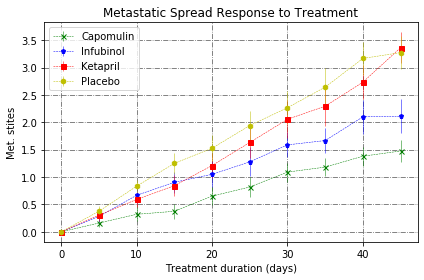

In [35]:
# Generate the Plot (with Error Bars)
plt.errorbar(Treatment_data.index, Treatment_data["Capomulin"], yerr=Meta_Deviation_data["Capomulin"], color="g", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Treatment_data.index, Treatment_data["Infubinol"], yerr=Meta_Deviation_data["Infubinol"], color="b", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Treatment_data.index, Treatment_data["Ketapril"], yerr=Meta_Deviation_data["Ketapril"], color="r", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Treatment_data.index, Treatment_data["Placebo"], yerr=Meta_Deviation_data["Placebo"], color="y", marker="h", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Metastatic Spread Response to Treatment")
plt.ylabel("Met. stites")
plt.xlabel("Treatment duration (days)")
plt.grid(b=True, which='major', color='#666666', linestyle='-.')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"],loc='upper left')

# Save the Figure
plt.savefig("Metastatic Spread Response to Treatment.png")

# Show the Figure
plt.show
plt.tight_layout()


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Surv_Data_grouped_df= combined_df.groupby(['Drug','Timepoint'])

Mouse_Count = Surv_Data_grouped_df["Mouse ID"].count()
# Perventage calculated in this table to represent the chart as requested by the exercise
Mouse_percent = Mouse_Count/25*100
# Convert to DataFrame
Survival_df =pd.DataFrame({"Mouse ID": Mouse_percent})
Survival_sorted_df =Survival_df.sort_values(["Drug","Timepoint"], ascending=True).reset_index()

# Preview DataFrame
Survival_sorted_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [19]:
# Minor Data Munging to Re-Format the Data Frames
Survival_data=Survival_sorted_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked
Survival_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


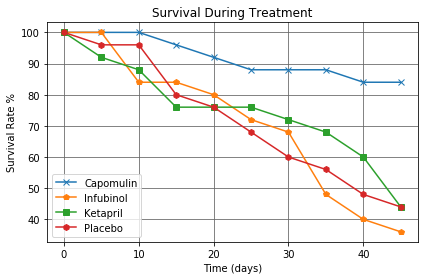

In [20]:
# Generate the Plot (with Error Bars)
Survival_chart = Survival_data

Timepoints= Survival_chart.index
Test1 = Survival_chart ['Capomulin']
Test2 = Survival_chart ['Infubinol']
Test3 = Survival_chart ['Ketapril']
Test4 = Survival_chart ['Placebo']
plt.plot(Timepoints,Test1, label ='Capomulin', marker = 'x')
plt.plot(Timepoints,Test2, label ='Infubinol', marker = 'p')
plt.plot(Timepoints,Test3, label ='Ketapril', marker = 's')
plt.plot(Timepoints,Test4, label ='Placebo', marker = 'h')
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate %")
plt.xlabel("Time (days)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(loc=0)

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure
plt.show
plt.tight_layout()


## Summary Bar Graph

In [21]:
tumor_pct_change =  100 * (Chart_data.iloc[-1] - Chart_data.iloc[0]) / Chart_data.iloc[0]
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

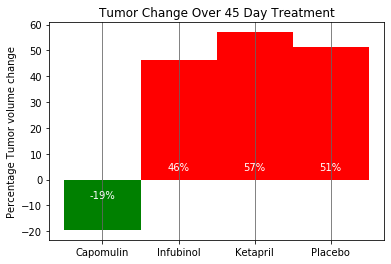

In [26]:
# Store all Relevant Percent Changes into a Tuple
Percent_change=(tumor_pct_change["Capomulin"],tumor_pct_change["Infubinol"],tumor_pct_change["Ketapril"],tumor_pct_change["Placebo"])
fig, ax=plt.subplots()


# Splice the data between passing and failing drugs
a= np.arange(len(Percent_change))
pa=ax.bar(a[0],Percent_change[0],width=1,color='green')
mi=ax.bar(a[1:],Percent_change[1:],width=1,color='red')

# Orient widths. Add labels, tick marks, etc. 
Drug=['Capomulin','Infubinol','Ketapril','Placebo']
plt.xticks(a,Drug)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Percentage Tumor volume change")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis="x")

# Use functions to label the percentages of changes
def label_failed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., 3,
               '%d%%' % int(height),ha='center', va='bottom', color="white")
def label_passed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., -8,
               '%d%%' % int(height),ha='center', va='bottom', color="white")

# Call functions to implement the function calls
label_failed(mi)
label_passed(pa)

# Save the Figure
plt.savefig("Tumor Change over Treatment Period.png")


# Show the Figure
fig.show()
